In [1]:
import scanpy as sc
import Topyfic
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42
sns.set_context('paper')

In [ ]:
data = sc.read_h5ad("../data/all_ModelAD_ENCODE_final_regulatory_genes_rep2.h5ad")

In [ ]:
top_model = Topyfic.read_topModel(f"../../Training/sn_reggenes_5xFAD_control_combine/15/topModel_sn_ModelAD_ENCODE_regGenes.p")

## analysis

In [4]:
analysis_top_model = Topyfic.Analysis(Top_model=top_model)
analysis_top_model.calculate_cell_participation(data=data)
analysis_top_model.save_analysis()

Reading TopModel done!
Saving analysis class as analysis_sn_ModelAD_ENCODE_regGenes.p


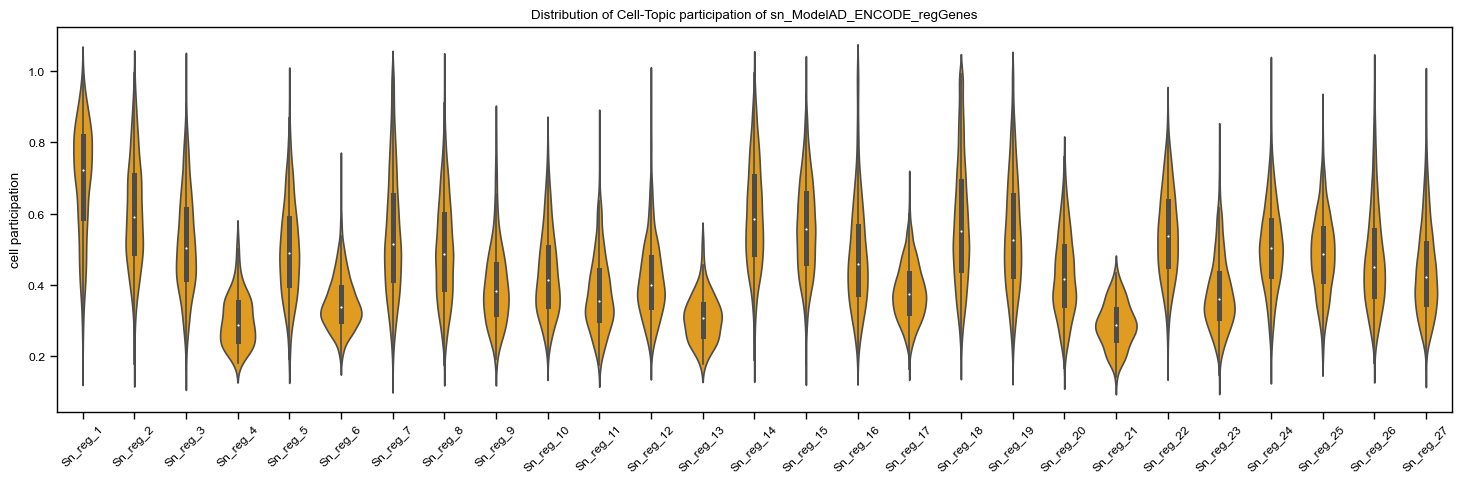

In [4]:
label = dict()
for i in range(analysis_top_model.top_model.N):
    key = f"Topic_{i+1}"
    value = f"Sn_reg_{i+1}"
    label[key] = value

analysis_top_model.cell_participation_distribution(plot_type="violin",
                                         threshold=0.05,
                                         max_topic=True,
                                         label=label,
                                         color="orange",
                                         save=True,
                                         show=True,
                                         file_format="pdf",
                                         file_name="figures/sn_regGenes_dist_cell_participation")

In [2]:
my_palette_timepoint = {'PNM_08': 'purple',}

my_palette_sex = {'Female': 'pink',
                  'Male': 'royalblue'}

my_palette_tissue = {'Cortex': 'chocolate',
                     'Hippocampus': 'orchid'}
my_palette_tissue = {'Cortex': '#0000B9', 
                     'Hippocampus': '#027148'}

my_palette_species = {'5xFADHEMI': 'orange',
                      '5xFADWT': 'lime',
                      'BL6/CAST': 'cyan', 
                      '5xFAD/CAST': 'violet'}

my_palette = {'species': my_palette_species,
              'tissue': my_palette_tissue,
              'sex': my_palette_sex,
              'timepoint' : my_palette_timepoint,}

Reading Analysis done!


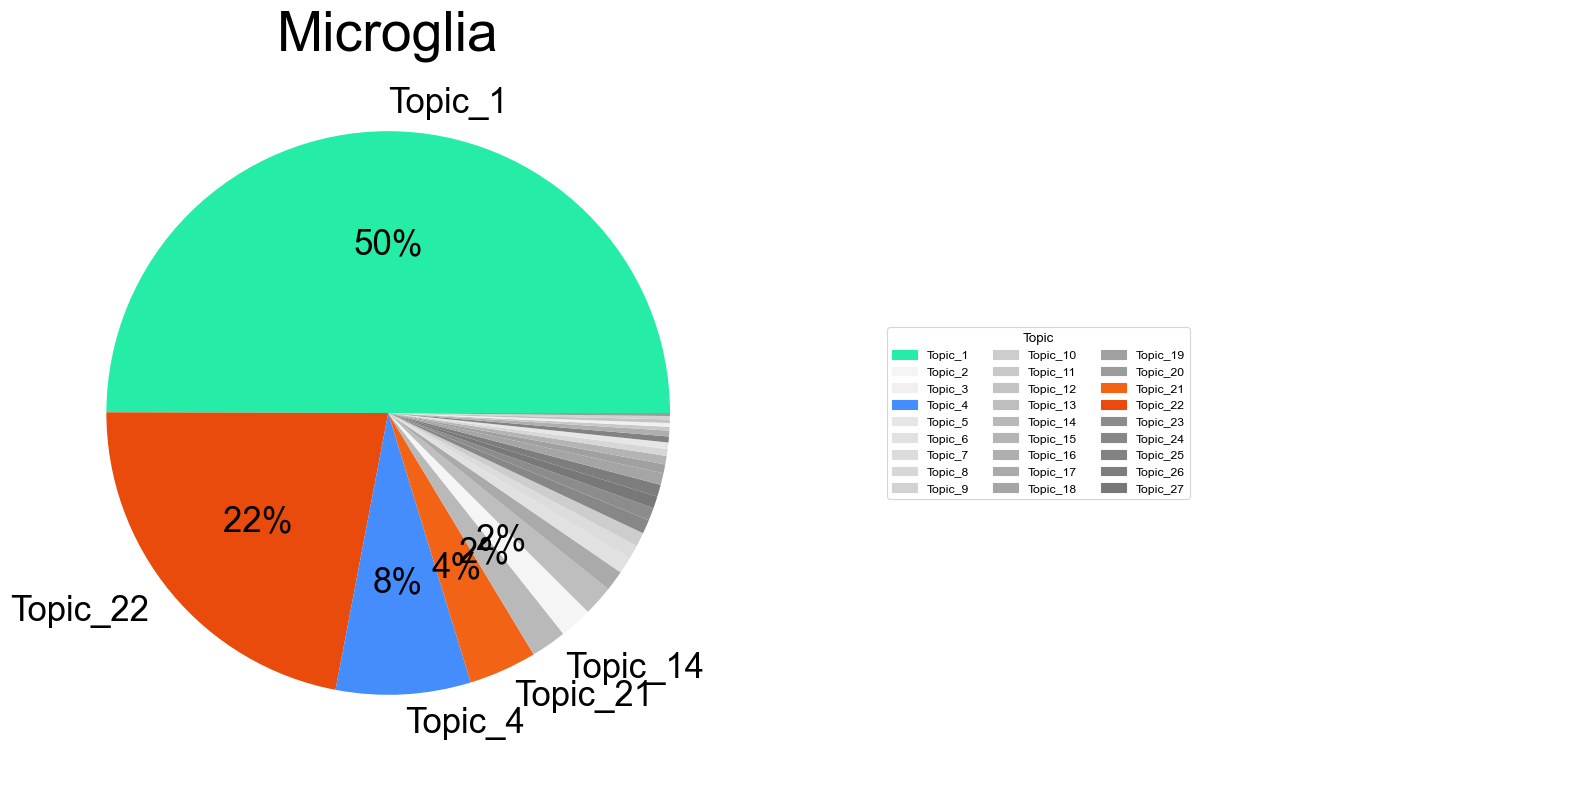

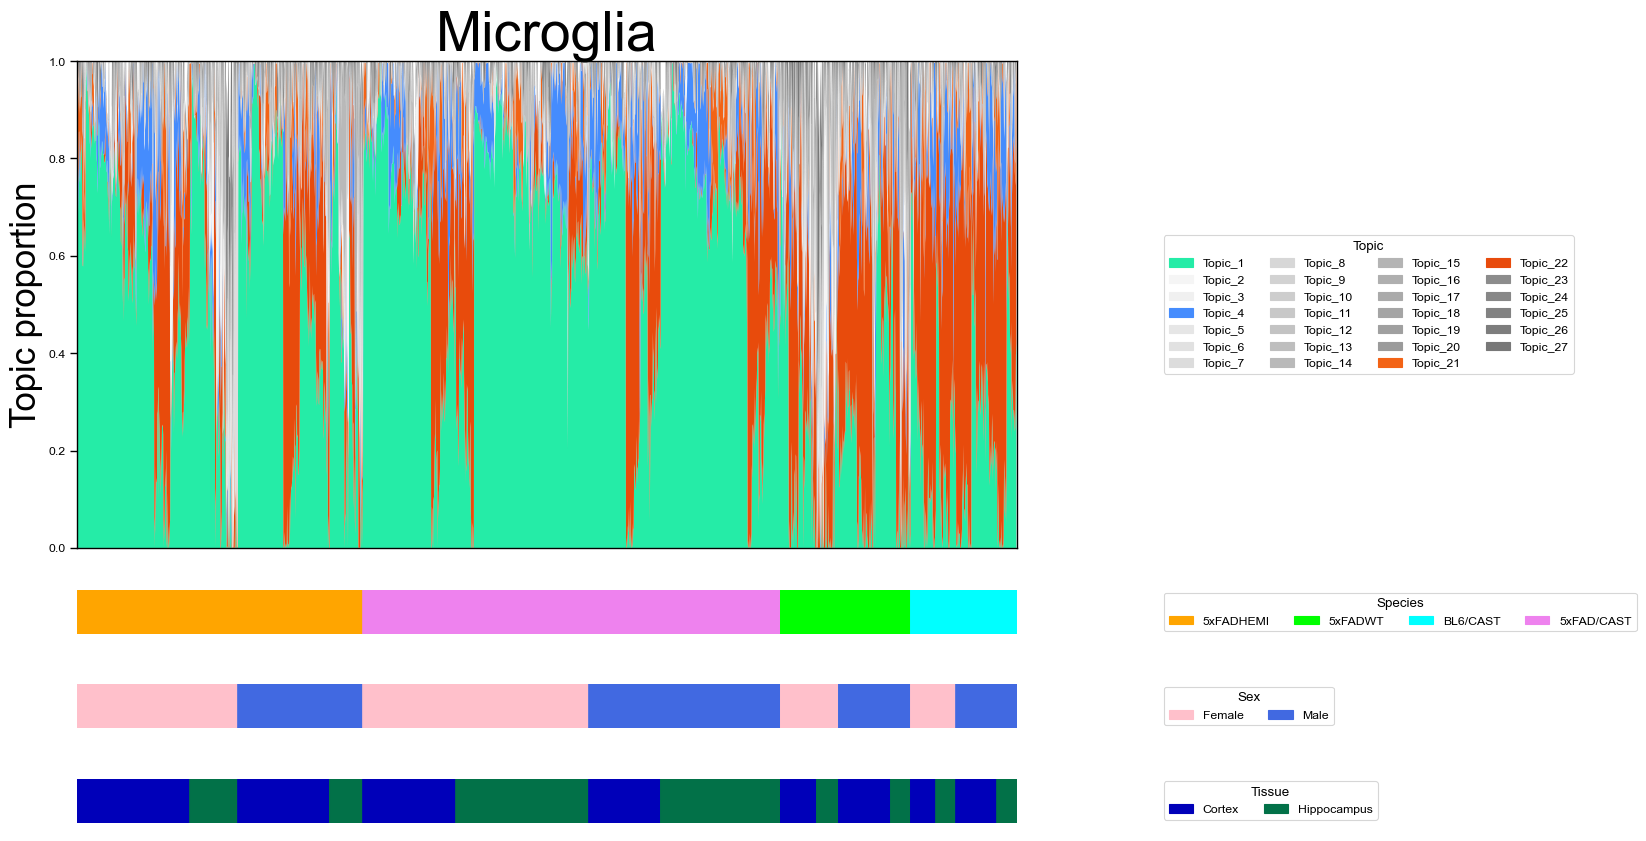

In [3]:
analysis_top_model = Topyfic.read_analysis(f"analysis_sn_ModelAD_ENCODE_regGenes.p")
analysis_top_model.cell_participation.obs.species = analysis_top_model.cell_participation.obs.species.cat.reorder_categories(['5xFADHEMI', '5xFAD/CAST', '5xFADWT', 'BL6/CAST'], ordered=True)

colors = sns.color_palette("gray", 50).as_hex()
j = 49
for i in range(analysis_top_model.colors_topics.shape[0]):
    analysis_top_model.colors_topics.colors[i] = colors[j]
    j = j - 1
analysis_top_model.colors_topics.colors["Topic_1"] = '#25eca7'
analysis_top_model.colors_topics.colors["Topic_22"] = "#e84b0c"
analysis_top_model.colors_topics.colors["Topic_4"] = "#458cfd"
analysis_top_model.colors_topics.colors["Topic_21"] = "#f36315"

topic_order = [
 'Topic_1',
 'Topic_22',
 'Topic_4',
 'Topic_21',
 'Topic_2',
 'Topic_3',
 'Topic_5',
 'Topic_6',
 'Topic_7',
 'Topic_8',
 'Topic_9',
 'Topic_10',
 'Topic_11',
 'Topic_12',
 'Topic_13',
 'Topic_14',
 'Topic_15',
 'Topic_16',
 'Topic_18',
 'Topic_19',
 'Topic_20',
 'Topic_23',
 'Topic_24',
 'Topic_25',
 'Topic_26',
 'Topic_27']
celltype = "Microglia"
subtypes = analysis_top_model.cell_participation.obs[analysis_top_model.cell_participation.obs.celltypes == celltype].subtypes.unique().tolist()

file_name = f"figures/pieChart/dist_topics_celltypes_RNA_{celltype}"
analysis_top_model.pie_structure_Chart(level='subtypes',
                                           category=subtypes,
                                            save=True,
                                            show=True,
                                           file_format='pdf',
                                            file_name=file_name)

file_name = f"figures/structurePlot/dist_topics_celltypes_RNA_timepoint_{celltype}"
analysis_top_model.structure_plot(level='subtypes',
                                    category=subtypes, 
                                  topic_order=topic_order,
                                      metaData=['species', "sex", "tissue"],
                                      metaData_palette=my_palette,
                                      order_cells=["species", "sex", "tissue", "hierarchy"],
                                      save=True,
                                      show=True,
                                      file_format='pdf',
                                      file_name=file_name)

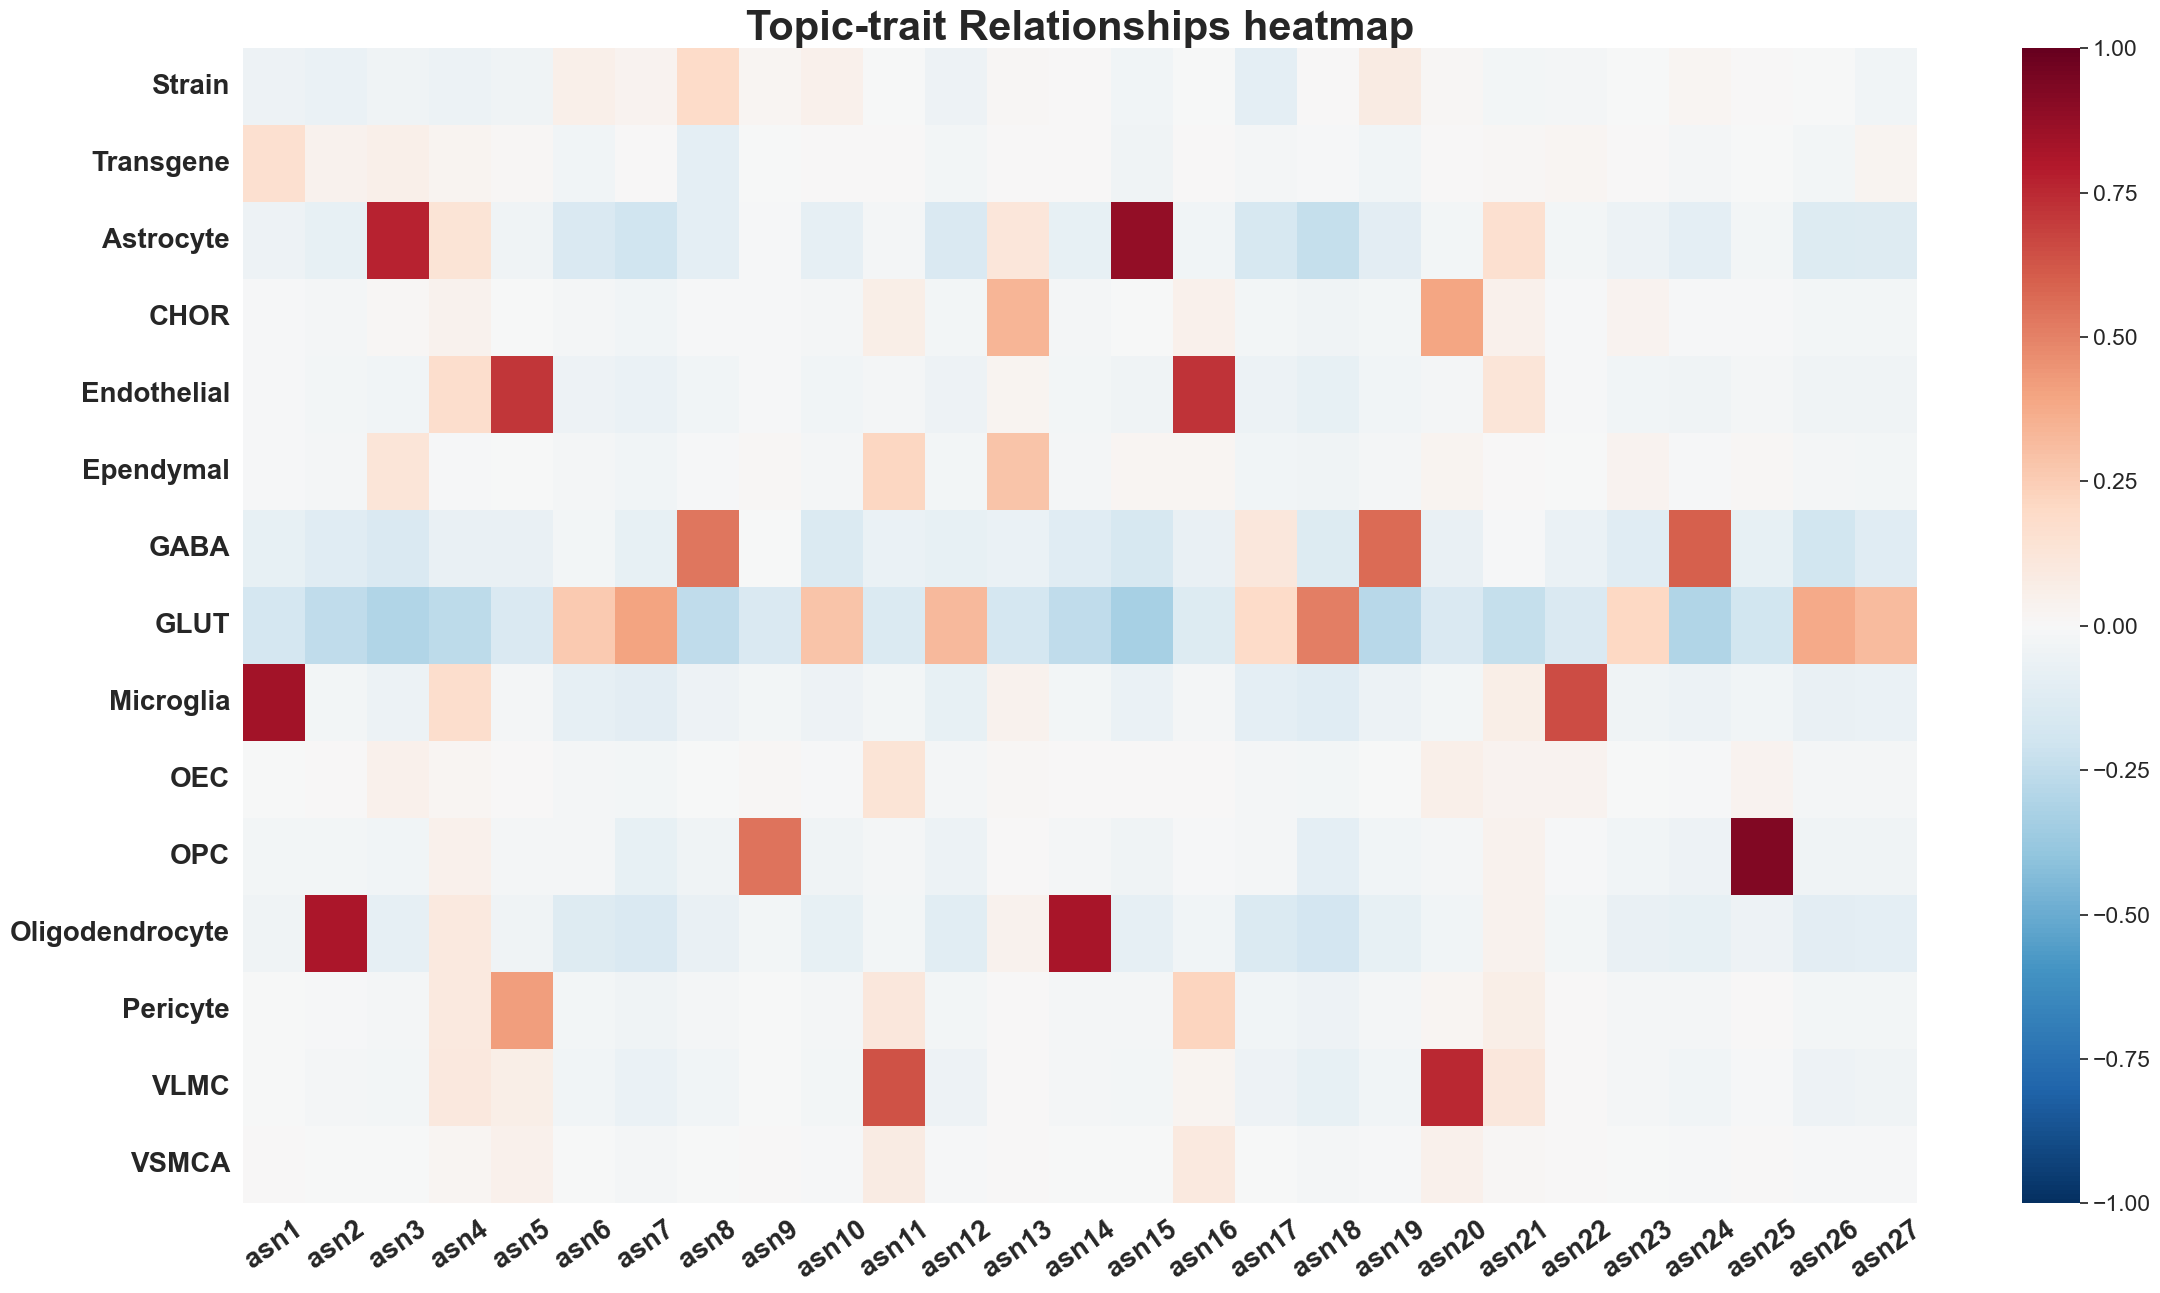

In [8]:
metadata = ["Strain", "Transgene", "celltypes"]
analysis_top_model.TopicTraitRelationshipHeatmap(metadata,
                                                 save=True,
                                                 show=False,
                                                 file_format='png',
                                                 file_name='figures/topic-traitRelationships')

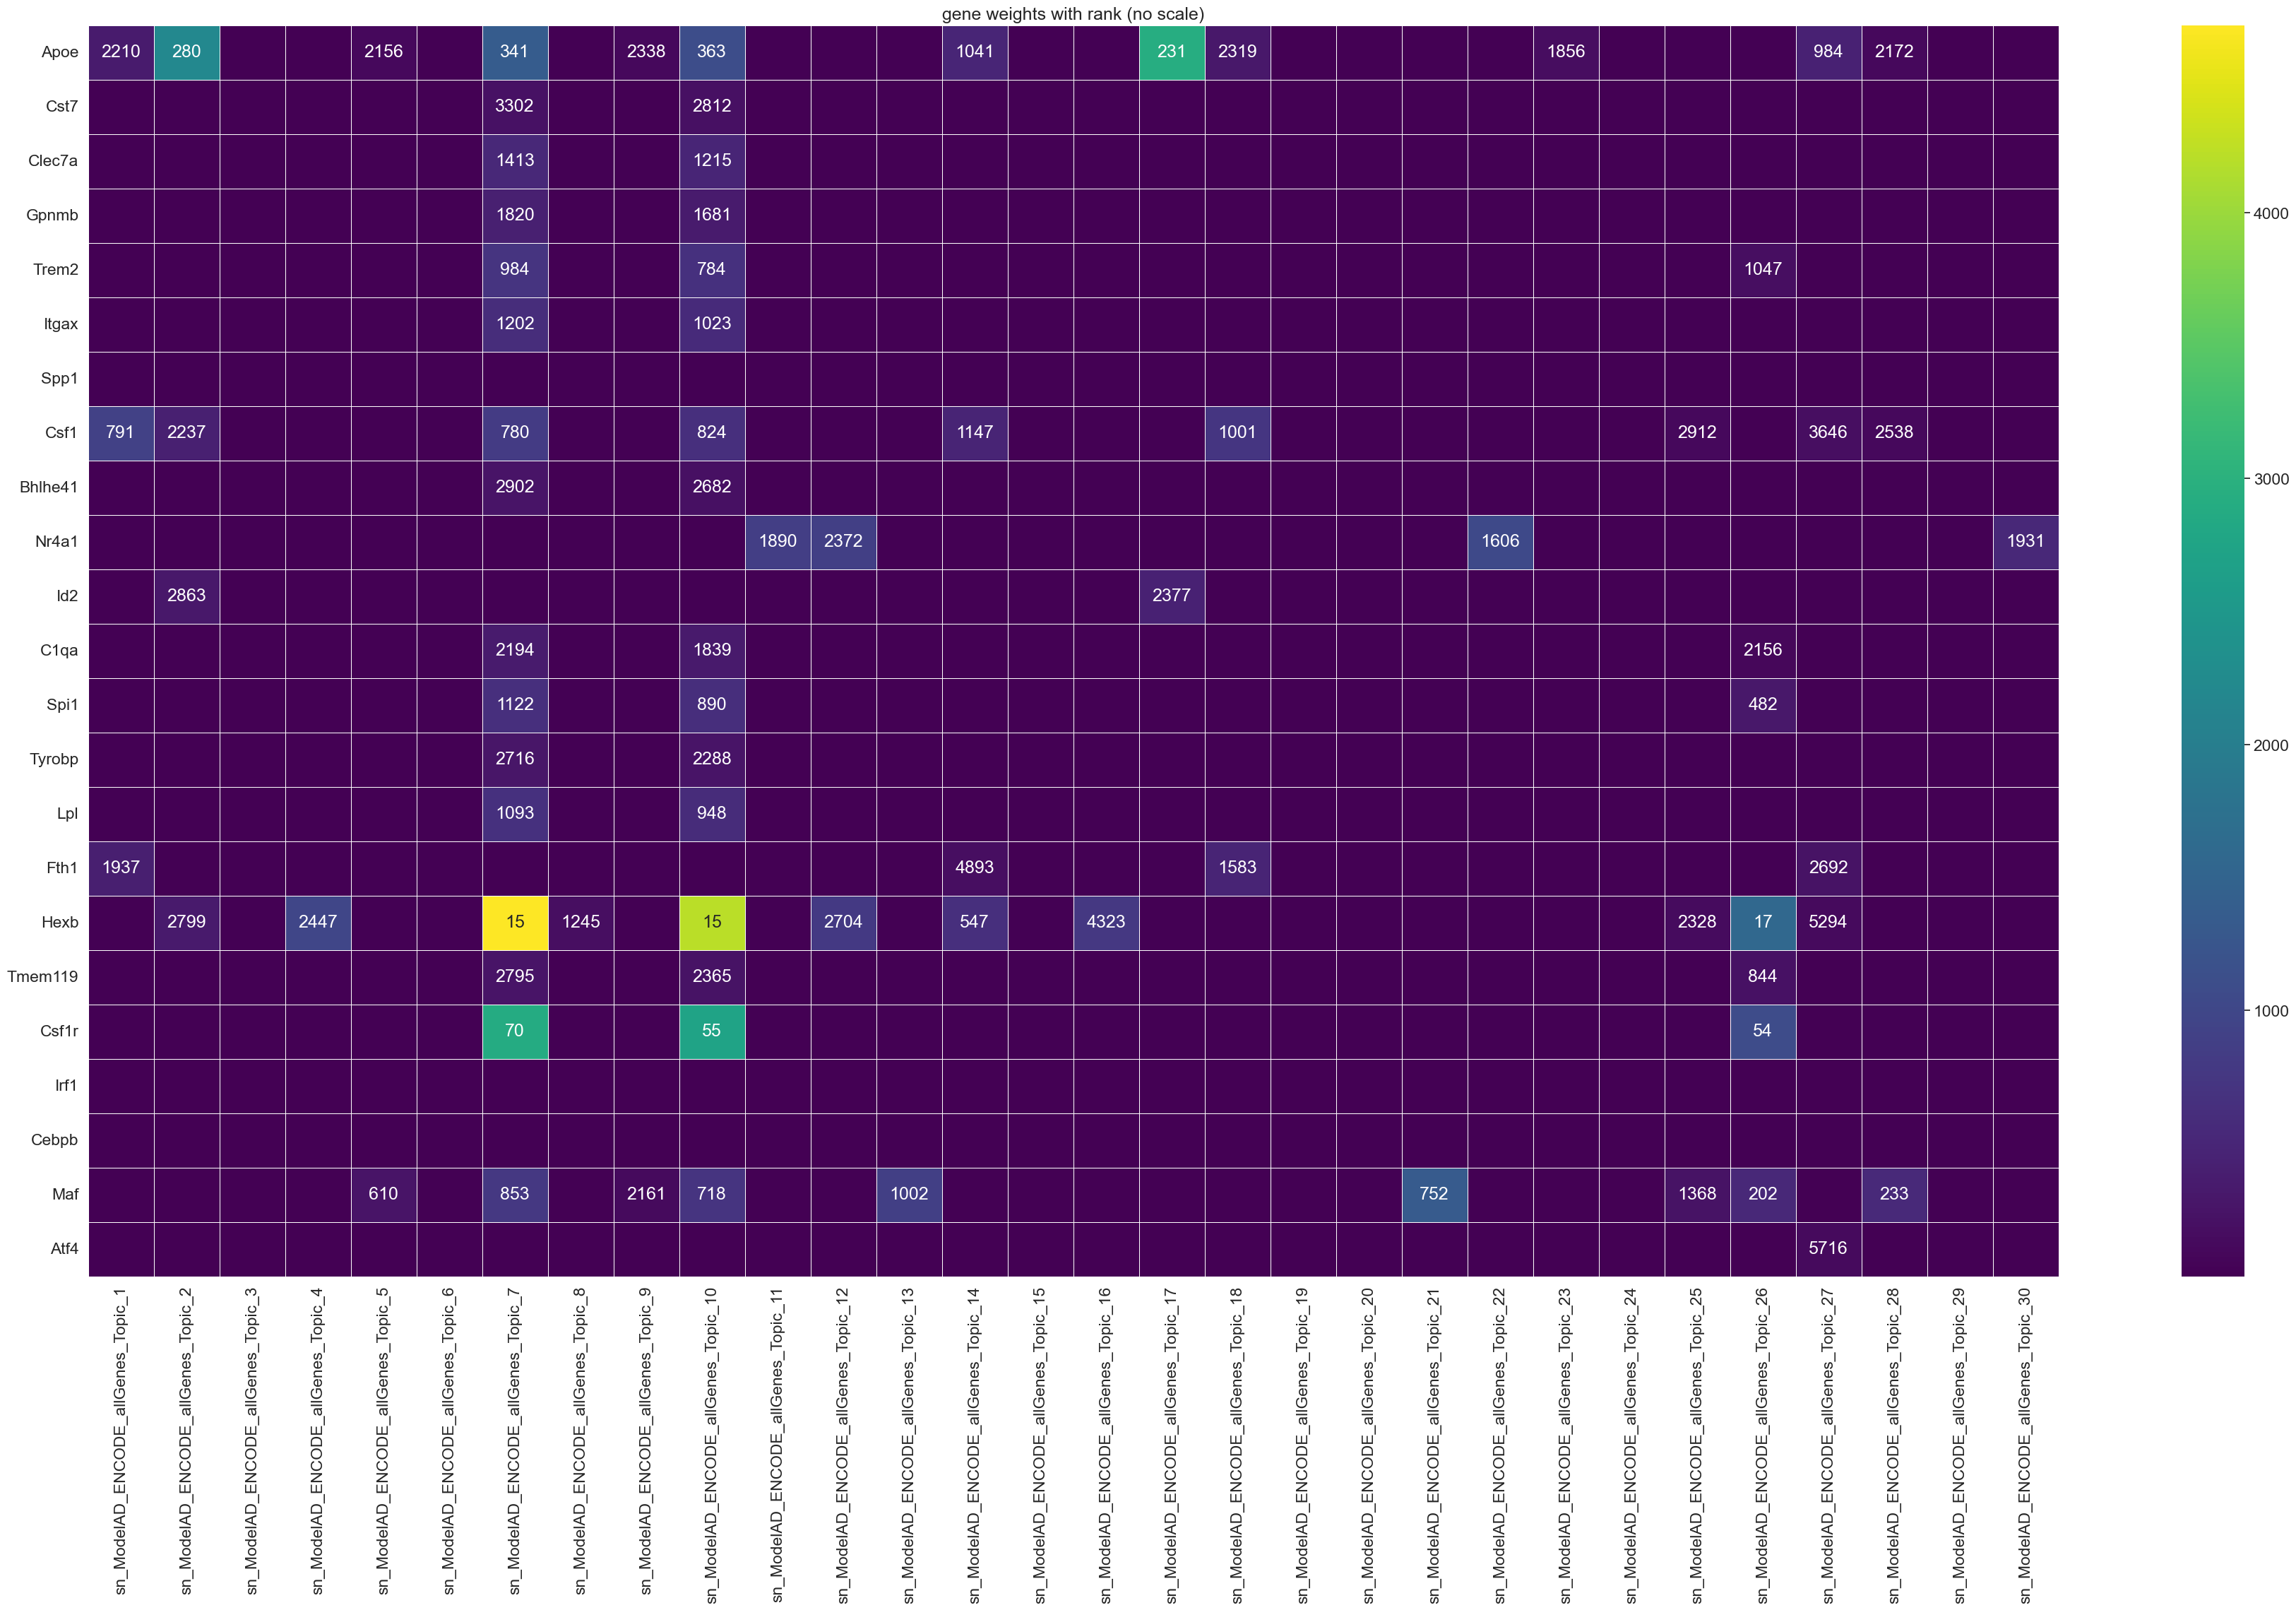

In [16]:
top_model.gene_weight_rank_heatmap(genes=["Apoe",
                                          "Cst7",
                                          "Clec7a", 
                                          "Gpnmb",
                                          "Trem2",
                                          "Itgax",
                                          "Spp1",
                                          "Csf1",
                                          "Bhlhe41", 
                                          "Nr4a1", 
                                          "Id2",
                                          "C1qa",
                                          "Spi1",
                                          "Tyrobp",
                                          "Lpl",
                                          "Fth1",
                                          "Hexb",
                                          "Tmem119", 
                                          "Csf1r", 
                                          "Irf1", 
                                          "Cebpb", 
                                          "Maf", 
                                          "Atf4"],
                                   file_format="pdf",
                                   file_name="figures/gene_weight_rank_heatmap")

## MA plot

Reading TopModel done!


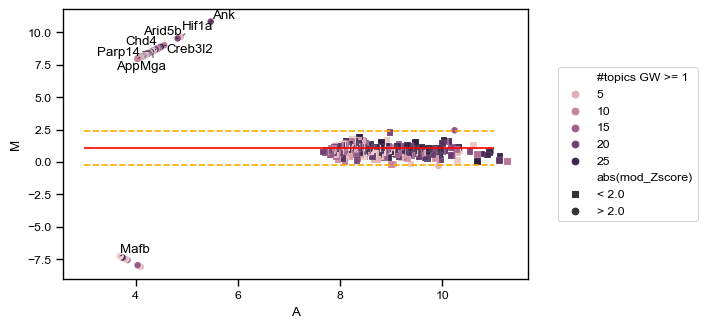

In [27]:
top_model = Topyfic.read_topModel(f"topModel_sn_ModelAD_ENCODE_regGenes.p")

size = top_model.get_gene_weights().copy(deep=True)
size[size > 1] = 1
size[size< 1] = 0

size = pd.DataFrame(size.sum(axis=1))

DAM = ['Mafb', 'Mga', 'Parp14', 'Chd4', 'App', 'Ank', 'Hif1a',
 'Arid5b',
 'Creb3l2',]
plt.figure(figsize=(6, 3.5))
gene_zscore = top_model.MA_plot(topic1="sn_ModelAD_ENCODE_regGenes_Topic_1", 
                                topic2="sn_ModelAD_ENCODE_regGenes_Topic_22", 
                                size=size,
                                pseudocount=1, 
                                threshold=2,
                                cutoff=2.0, 
                                labels=DAM,
                                file_name="figures/MA_plot/microglia_1_22")